In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch
from matplotlib import gridspec
import emoji

In [85]:
# confs = [.9, .15, .45, 1.0, .3]
confs = [.9, .15, .25, 1.0, .3]
# confs = [.9, .65, .27, 1.0, .3]
is_correct = [1.0, 0.0, 1.0, 1.0, 0.0]
# times = [5.0, 10.0, 6.0, 3.0, 11.0]

In [86]:
def create_match(a):
    return [i for i,val in enumerate(a) if val == 1.0]
def P(a,b):
    a,b = create_match(a), create_match(b)
    return float(len(set(a).intersection(set(b)))) / len(set(a)) if len(set(a))>0 else 0
def R(a,b):
    a,b = create_match(a), create_match(b)
    return float(len(set(a).intersection(set(b)))) / 4
def F(a,b):
    return (2*P(a,b)*R(a,b))/(P(a,b)+R(a,b)) if (P(a,b)+R(a,b))>0 else 0
def EP(a):
    return sum(a)/len([ai for ai in a if ai>0]) if len([ai for ai in a if ai>0])>0 else 0.0
def EF(a):
    return 2*sum(a)/(len([ai for ai in a if ai>0])+4)

In [87]:
Rs = {'real_R': [], 'real_P': [], 'pred_P': [], 'real_F': [], 'pred_F': []}
Ps = {'real_R': [], 'real_P': [], 'pred_P': [], 'real_F': [], 'pred_F': []}
Fs = {'real_R': [], 'real_P': [], 'pred_P': [], 'real_F': [], 'pred_F': []}
temp_real_R, temp_real_P, temp_pred_P, temp_real_F, temp_pred_F = [0]*5, [0]*5, [0]*5, [0]*5, [0]*5
threshold_P, threshold_F = [], []
# [], [], [], [], []
for e in range(len(confs)):
    temp_real_R[e] = 1.0
    Rs['real_R'] += [R(temp_real_R, is_correct)]
    Ps['real_R'] += [P(temp_real_R, is_correct)]
    Fs['real_R'] += [F(temp_real_R, is_correct)]
    
    CURR_P = P(temp_real_P, is_correct)
#     temp_real_P[e] = 1.0 if confs[e] >= CURR_P else 0.0
    temp_real_P[e] = 1.0 if confs[e] >= 1.0 else 0.0
    Rs['real_P'] += [R(temp_real_P, is_correct)]
    Ps['real_P'] += [P(temp_real_P, is_correct)]
    Fs['real_P'] += [F(temp_real_P, is_correct)]
    
    CURR_P = EP([c for i, c in enumerate(confs[:e]) if temp_pred_P[i] == 1.0])
    threshold_P += [CURR_P,]
    temp_pred_P[e] = 1.0 if confs[e] >= CURR_P else 0.0
    Rs['pred_P'] += [R(temp_pred_P, is_correct)]
    Ps['pred_P'] += [P(temp_pred_P, is_correct)]
    Fs['pred_P'] += [F(temp_pred_P, is_correct)]
    
    CURR_F = F(temp_real_F, is_correct)
#     temp_real_F[e] = 1.0 if confs[e] >= 0.5*CURR_F else 0.0
    temp_real_F[e] = 1.0 if confs[e] >= 0.5 else 0.0
    Rs['real_F'] += [R(temp_real_F, is_correct)]
    Ps['real_F'] += [P(temp_real_F, is_correct)]
    Fs['real_F'] += [F(temp_real_F, is_correct)]
    
    CURR_F = EF([c for i, c in enumerate(confs[:e]) if temp_pred_F[i] == 1.0])
    threshold_F += [0.5*CURR_F,]
    temp_pred_F[e] = 1.0 if confs[e] >= 0.5*CURR_F else 0.0
    Rs['pred_F'] += [R(temp_pred_F, is_correct)]
    Ps['pred_F'] += [P(temp_pred_F, is_correct)]
    Fs['pred_F'] += [F(temp_pred_F, is_correct)]

In [88]:
Ps

{'real_R': [1.0, 0.5, 0.6666666666666666, 0.75, 0.6],
 'real_P': [0, 0, 0, 1.0, 1.0],
 'pred_P': [1.0, 1.0, 1.0, 1.0, 1.0],
 'real_F': [1.0, 1.0, 1.0, 1.0, 1.0],
 'pred_F': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [89]:
Rs

{'real_R': [0.25, 0.25, 0.5, 0.75, 0.75],
 'real_P': [0.0, 0.0, 0.0, 0.25, 0.25],
 'pred_P': [0.25, 0.25, 0.25, 0.5, 0.5],
 'real_F': [0.25, 0.25, 0.25, 0.5, 0.5],
 'pred_F': [0.25, 0.25, 0.5, 0.75, 0.75]}

In [90]:
Fs

{'real_R': [0.4,
  0.3333333333333333,
  0.5714285714285715,
  0.75,
  0.6666666666666665],
 'real_P': [0, 0, 0, 0.4, 0.4],
 'pred_P': [0.4, 0.4, 0.4, 0.6666666666666666, 0.6666666666666666],
 'real_F': [0.4, 0.4, 0.4, 0.6666666666666666, 0.6666666666666666],
 'pred_F': [0.4,
  0.4,
  0.6666666666666666,
  0.8571428571428571,
  0.8571428571428571]}

In [92]:
threshold_P

[0.0, 0.9, 0.9, 0.9, 0.95]

In [93]:
threshold_F

[0.0, 0.18, 0.18, 0.19166666666666665, 0.3071428571428571]

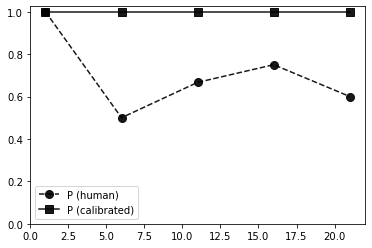

In [74]:
x = [1,6,11,16,21]

# plt.plot(x, Rs['real_R'], alpha=0.5, color = 'black', linestyle='dashed')
plt.plot(x, Ps['real_R'], marker='o', markersize=8, alpha=0.9, color = 'black', linestyle='dashed', label='P (human)')
plt.plot(x, Ps['pred_P'], marker='s', markersize=8, alpha=0.9, color = 'black', label='P (calibrated)')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.legend(loc = 'lower left')
plt.show()

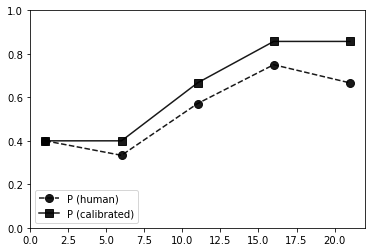

In [75]:
x = [1,6,11,16,21]

# plt.plot(x, Rs['real_R'], alpha=0.5, color = 'black', linestyle='dashed')
plt.plot(x, Fs['real_R'], marker='o', markersize=8, alpha=0.9, color = 'black', linestyle='dashed', label='P (human)')
plt.plot(x, Fs['pred_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='P (calibrated)')
plt.yticks(np.arange(0.0, 1.2, 0.2))
# plt.xticks(x, x_labels, fontsize=10, rotation = 15)
plt.legend(loc = 'lower left')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

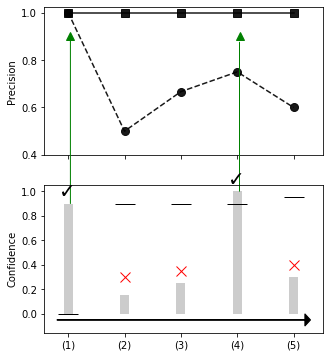

In [36]:
x = [1,6,11,16,21]
# x_labels = ['$(orderDate,poDay)$\n 0.80',
#             '$(orderNumber,poTime)$\n 0.65',
#             '$(orderDate,poTime)$\n 0.49',
#             '$(city,city)$\n 1.0',
#             '$(orderNumber,poDay)$\n 0.30']
# x_labels = ['(1)\n(orderDate,poDay)',
#             '$(orderNumber,poTime)$',
#             '$(orderDate,poTime)$',
#             '$(city,city)$',
#             '$(orderNumber,poDay)$']
x_labels = ['(1)','(2)','(3)','(4)','(5)',]
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (5,6))

ax1.plot(x, Ps['real_R'], marker='o', markersize=8, alpha=0.9, color = 'black', linestyle='dashed', label='P (human)')
ax1.plot(x, Ps['pred_P'], marker='s', markersize=8, alpha=0.9, color = 'black', label='P (calibrated)')
ax2.plot(x, threshold_P, marker='_', markersize=20, alpha=1, color = 'black', linewidth = 0, label='confidence')
ax2.bar(x, confs, alpha=0.2, color = 'black', label='threshold')
ax1.set_ylabel('Precision')
ax2.set_ylabel('Confidence')
# plt.plot(x, Fs['real_R'], marker='s', markersize=8, alpha=0.4, color = 'black', linestyle='dashed', label='F (human)')
# plt.plot(x, Fs['real_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='F (calibrated)')
plt.xticks(x, x_labels, fontsize=10)
xy = (1.2,0.9)
con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="green")
ax2.add_artist(con)
ax1.plot(1.2, 0.9,'g^',markersize=7.5)
# ax2.plot(1, 0.97,'gv',markersize=10)

xy1 = (16.2,1.0)
xy2 = (16.2,0.875)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="green")
ax2.add_artist(con)
ax1.plot(16.2, 0.9,'g^',markersize=7.5)
# ax2.plot(16, 1.1,'gv',markersize=10)

plt.text(0.2, 0.95, u'\u2713', fontsize=20)
ax2.plot(6, 0.3,'rx',markersize=10)
ax2.plot(11, 0.35,'rx',markersize=10)
plt.text(15.2, 1.05, u'\u2713', fontsize=20)
ax2.plot(21, 0.4,'rx',markersize=10)

ax1.set_yticks(np.arange(0.4, 1.2, 0.2))
ax2.set_yticks(np.arange(0.0, 1.2, 0.2))
# fig.text(0.5, 0.85, '+', fontsize=16)
# fig.text(15.5, 0.85, '+', fontsize=16)
# plt.legend(loc = 'lower left')
ax2.arrow(0, -0.05, 22, 0, head_width=0.1, head_length=0.5, fc='k', ec='k')
plt.savefig('exampleP.eps', format='eps')
plt.show()

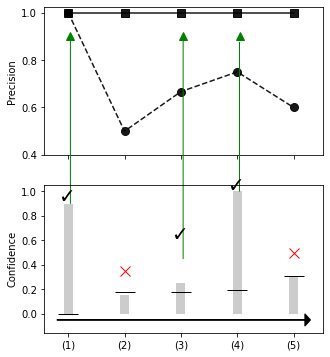

In [24]:
# x = [1,6,11,16,21]
# # x_labels = ['$(orderDate,poDay)$\n 0.80',
# #             '$(orderNumber,poTime)$\n 0.65',
# #             '$(orderDate,poTime)$\n 0.49',
# #             '$(city,city)$\n 1.0',
# #             '$(orderNumber,poDay)$\n 0.30']
# # x_labels = ['(1)\n(orderDate,poDay)',
# #             '$(orderNumber,poTime)$',
# #             '$(orderDate,poTime)$',
# #             '$(city,city)$',
# #             '$(orderNumber,poDay)$']
# x_labels = ['(1)','(2)','(3)','(4)','(5)',]
# fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (5,6))

# ax1.plot(x, Ps['real_R'], marker='o', markersize=8, alpha=0.9, color = 'black', linestyle='dashed', label='P (human)')
# ax1.plot(x, Ps['pred_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='P (calibrated)')
# ax2.plot(x, threshold_F, marker='_', markersize=20, alpha=1, color = 'black', linewidth = 0, label='confidence')
# ax2.bar(x, confs, alpha=0.2, color = 'black', label='threshold')
# ax1.set_ylabel('Precision')
# ax2.set_ylabel('Confidence')
# # plt.plot(x, Fs['real_R'], marker='s', markersize=8, alpha=0.4, color = 'black', linestyle='dashed', label='F (human)')
# # plt.plot(x, Fs['real_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='F (calibrated)')
# plt.xticks(x, x_labels, fontsize=10)
# xy = (1.2,0.9)
# con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
#                       axesA=ax2, axesB=ax1, color="green")
# ax2.add_artist(con)
# ax1.plot(1.2, 0.9,'g^',markersize=7.5)
# # ax2.plot(1, 0.97,'gv',markersize=10)

# xy1 = (11.2,0.45)
# xy2 = (11.2,0.9)
# con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
#                       axesA=ax2, axesB=ax1, color="green")
# ax2.add_artist(con)
# ax1.plot(11.2, 0.9,'g^',markersize=7.5)

# xy1 = (16.2,1.0)
# xy2 = (16.2,0.875)
# con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
#                       axesA=ax2, axesB=ax1, color="green")
# ax2.add_artist(con)
# ax1.plot(16.2, 0.9,'g^',markersize=7.5)
# # ax2.plot(16, 1.1,'gv',markersize=10)

# plt.text(0.2, 0.91, u'\u2713', fontsize=20)
# ax2.plot(6, 0.35,'rx',markersize=10)
# # ax2.plot(11, 0.6,'rx',markersize=10)
# plt.text(10.2, 0.6, u'\u2713', fontsize=20)
# plt.text(15.2, 1.0, u'\u2713', fontsize=20)
# ax2.plot(21, 0.5,'rx',markersize=10)

# ax1.set_yticks(np.arange(0.4, 1.2, 0.2))
# ax2.set_yticks(np.arange(0.0, 1.2, 0.2))
# # fig.text(0.5, 0.85, '+', fontsize=16)
# # fig.text(15.5, 0.85, '+', fontsize=16)
# # plt.legend(loc = 'lower left')
# ax2.arrow(0, -0.05, 22, 0, head_width=0.1, head_length=0.5, fc='k', ec='k')
# # plt.savefig('exampleP.eps', format='eps')
# plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

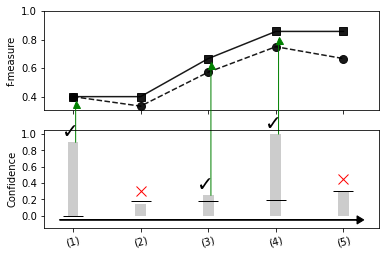

In [83]:
# fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (4,4))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
# 
ax1.plot(x, Fs['real_R'], marker='o', markersize=8, alpha=0.9, color = 'black', linestyle='dashed', label='P (human)')
ax1.plot(x, Fs['pred_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='P (calibrated)')
ax2.plot(x, threshold_F, marker='_', markersize=20, alpha=1, color = 'black', linewidth = 0, label='confidence')
ax2.bar(x, confs, alpha=0.2, color = 'black', label='threshold')
ax1.set_ylabel('f-measure')
ax2.set_ylabel('Confidence')
# plt.plot(x, Fs['real_R'], marker='s', markersize=8, alpha=0.4, color = 'black', linestyle='dashed', label='F (human)')
# plt.plot(x, Fs['real_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='F (calibrated)')
plt.xticks(x, x_labels, fontsize=10, rotation = 15)
xy1 = (1.2,0.35)
xy2 = (1.2,0.9)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="green")
ax2.add_artist(con)
ax1.plot(1.2, 0.35,'g^',markersize=7)
# ax2.plot(1.2, 0.95,'gv',markersize=10)

xy1 = (11.2,0.62)
xy2 = (11.2,0.25)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="green")
ax2.add_artist(con)
ax1.plot(11.2, 0.62,'g^',markersize=7)
# ax2.plot(11, 0.525,'gv',markersize=10)

xy1 = (16.2,1.0)
xy2 = (16.2,0.8)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="green")
ax2.add_artist(con)
ax1.plot(16.2, 0.8,'g^',markersize=7)
# ax2.plot(16, 1.1,'gv',markersize=10)

plt.text(0.2, 0.95, u'\u2713', fontsize=20)
ax2.plot(6, 0.3,'rx',markersize=10)
plt.text(10.2, 0.3, u'\u2713', fontsize=20)
plt.text(15.2, 1.05, u'\u2713', fontsize=20)
ax2.plot(21, 0.45,'rx',markersize=10)


ax1.set_yticks(np.arange(0.4, 1.1, 0.2))
ax2.set_yticks(np.arange(0.0, 1.2, 0.2))
# fig.text(0.5, 0.85, '+', fontsize=16)
# fig.text(15.5, 0.85, '+', fontsize=16)
# plt.legend(loc = 'lower left')
ax2.arrow(0, -0.05, 22, 0, head_width=0.1, head_length=0.5, fc='k', ec='k')
plt.savefig('exampleF.eps', format='eps')
plt.show()

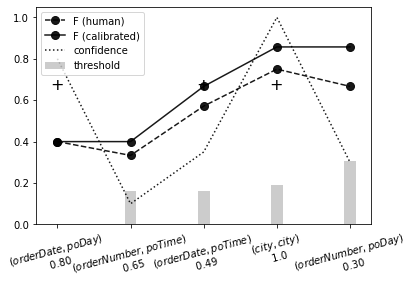

In [268]:
# x = [1,6,11,16,21]
# x_labels = ['$(orderDate,poDay)$\n 0.80',
#             '$(orderNumber,poTime)$\n 0.65',
#             '$(orderDate,poTime)$\n 0.49',
#             '$(city,city)$\n 1.0',
#             '$(orderNumber,poDay)$\n 0.30']

# # plt.plot(x, Rs['real_R'], alpha=0.5, color = 'black', linestyle='dashed')
# plt.plot(x, Fs['pred_R'], marker='o', markersize=8, alpha=0.9, color = 'black', linestyle='dashed', label='F (human)')
# plt.plot(x, Fs['pred_F'], marker='o', markersize=8, alpha=0.9, color = 'black', label='F (calibrated)')
# plt.plot(x, confs, alpha=0.9, color = 'black', linestyle='dotted', label='confidence')
# plt.bar(x, threshold_F, alpha=0.2, color = 'black', label='threshold')
# # plt.plot(x, Fs['real_R'], marker='s', markersize=8, alpha=0.4, color = 'black', linestyle='dashed', label='F (human)')
# # plt.plot(x, Fs['real_F'], marker='s', markersize=8, alpha=0.9, color = 'black', label='F (calibrated)')
# plt.yticks(np.arange(0.0, 1.2, 0.2))
# plt.xticks(x, x_labels, fontsize=10, rotation = 15)
# plt.text(0.5, 0.65, '+', fontsize=16)
# # plt.text(5.5, 0.65, '+', fontsize=16)
# plt.text(10.5, 0.65, '+', fontsize=16)
# plt.text(15.5, 0.65, '+', fontsize=16)
# plt.legend(loc = 'upper left')
# plt.show()

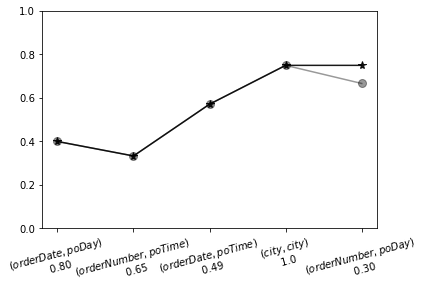

In [163]:
x = [1,6,11,16,21]
x_labels = ['$(orderDate,poDay)$\n 0.80',
            '$(orderNumber,poTime)$\n 0.65',
            '$(orderDate,poTime)$\n 0.49',
            '$(city,city)$\n 1.0',
            '$(orderNumber,poDay)$\n 0.30']
plt.plot(x, Fs['real_R'], marker='o', markersize=8, alpha=0.4, color = 'black')
# plt.plot(x, Fs['real_P'], marker='s', markersize=8, alpha=0.7, color = 'black')
plt.plot(x, Fs['real_F'], marker='*', markersize=8, alpha=0.9, color = 'black')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.xticks(x, x_labels, fontsize=10, rotation = 15)
plt.show()

In [73]:
emoji.emojize(':thumbs_up:')

'👍'